In [1]:
import sys
sys.path.append('../..')
import pennylane.numpy as np
import matplotlib.pyplot as plt
import pennylane as qml

In [2]:
from qubap.pennylane.costfunc_barren_plateau import global2local, test_hamiltonian_2
from qubap.pennylane.variational_algorithms import VQE
from qubap.pennylane.state_efficient_ansatz_pennylane import ansatz_constructor

### __State Efficient Ansatz__: Pennylane

General parameters

In [ ]:
reps = 1
num_wires = 6
maxiter   = 100
n_qbits = num_wires

#optimizer = qml.GradientDescentOptimizer(0.01)
optimizer = qml.SPSAOptimizer(maxiter=maxiter)

Create the hamiltonian to test

In [11]:
hamiltonian = test_hamiltonian_2( num_wires, [0,0,1] )

Also the State Efficient Ansatz with random initial parameters

In [ ]:
SEA = ansatz_constructor(n_qbits , deep=[reps,reps,reps])

num_params_SEA = ( reps +1 )*n_qbits + reps*(n_qbits - 2)
params_SEA = [ np.random.randn( num_params_SEA )*np.pi for _ in range(3)]

A general Ansatz with the initial parameters

In [ ]:
params_in = np.random.randn( 6*num_wires )*np.pi

def ansatz(params, num_layers=2):
    
    num_wires = len(params)//(2*num_layers+2)

    K = 0
    for i in range(num_layers):
        qml.broadcast( qml.RY, wires=range(num_wires), pattern='single', parameters=params[K:K+num_wires] )
        qml.broadcast( qml.RZ, wires=range(num_wires), pattern='single', parameters=params[K+num_wires:K+2*num_wires] )
        qml.broadcast( qml.CNOT, wires=range(num_wires), pattern='ring')
        K = K+2*num_wires

    qml.broadcast( qml.RY, wires=range(num_wires), pattern='single', parameters=params[K:K+num_wires] )
    qml.broadcast( qml.RZ, wires=range(num_wires), pattern='single', parameters=params[K+num_wires:K+2*num_wires] )

In [21]:
pars_out, results_SEA = VQE(hamiltonian, SEA, params_SEA, optimizer, shots=2**6, max_iterations=maxiter)

In [14]:
pars_out, results_general= VQE( hamiltonian, ansatz, params_in, optimizer, shots=2**6, max_iterations=maxiter )

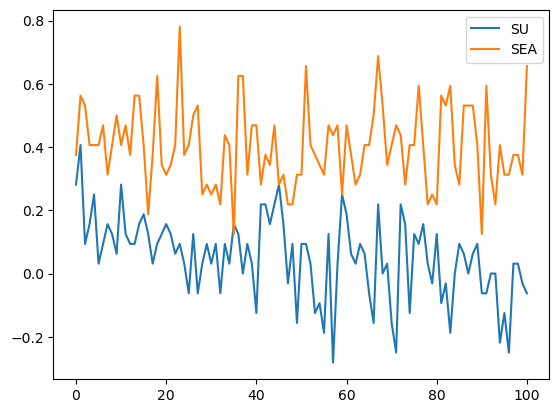

In [22]:
plt.plot( results_general, label='general' )
plt.plot( results_SEA, label='SEA' )
plt.legend(  )